In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import zipfile

In [9]:
#set the target file
target='c:\\Users\\ADMIN\\AppData\\Local\\Temp'
import os
magic_names=os.path.join(target,'magic04.names')
magic_data=os.path.join(target,'Rar$DRa3528.2245\\magic04.data')
columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','Class']
df=pd.read_csv(magic_data,header=None,names=columns)




In [10]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  Class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [12]:
#df.corr()#From the output we can't see the correlation for the column class coz its categorical and not numerical
df['Class'].describe()
#df['Class'].unique()

count     19020
unique        2
top           g
freq      12332
Name: Class, dtype: object

In [13]:
#Class column is in string form let's convert it to an integer column
for i in range(len(df)):
    if df.loc[i,'Class']=="g":
        df.loc[i,'Class']=True
    elif df.loc[i,'Class']=="h":
        df.loc[i,'Class']=False   
df['Class']=df['Class'].astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [14]:
# Parameters
# method : {'pearson', 'kendall', 'spearman'} or callable
#     Method of correlation:

# pearson : standard correlation coefficient
# kendall : Kendall Tau correlation coefficient
# spearman : Spearman rank correlation
# callable: callable with input two 1d ndarrays and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable's behavior. min_periods : int, optional Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation. numeric_only : bool, default False Include only float, int or boolean data.
# Returns
# DataFrame
#     Correlation matrix.

# See Also
# DataFrame.corrwith : Compute pairwise correlation with another
#     DataFrame or Series.
# Series.corr : Compute the correlation between two Series.

# Notes
# Pearson, Kendall and Spearman correlation are currently computed using pairwise complete observations.

# Pearson correlation coefficient <https://en.wikipedia.org/wiki/Pearson_correlation_coefficient>_
# Kendall rank correlation coefficient <https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient>_
# Spearman's rank correlation coefficient <https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient>_
# Examples
# >>> def histogram_intersection(a, b):
# ...     v = np.minimum(a, b).sum().round(decimals=1)
# ...     return v
# >>> df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
# ...                   columns=['dogs', 'cats'])
# >>> df.corr(method=histogram_intersection)
#       dogs  cats
# dogs   1.0   0.3
# cats   0.3   1.0
# >>> df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
# ...                   columns=['dogs', 'cats'])
# >>> df.corr(min_periods=3)
#       dogs  cats
# dogs   1.0   NaN
# cats   NaN   1.0

df.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,-0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,-0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,-0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,-0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,-0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,-0.065203


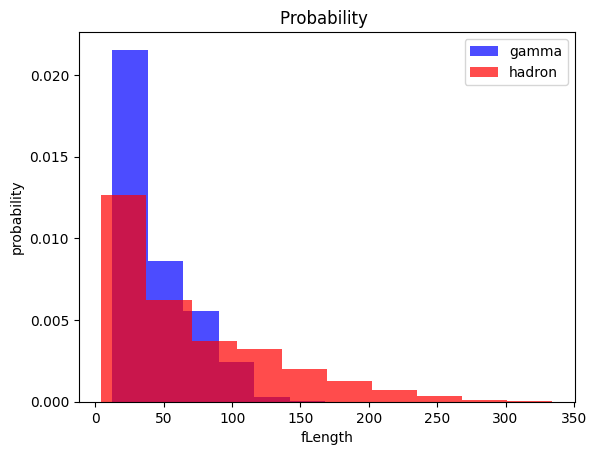

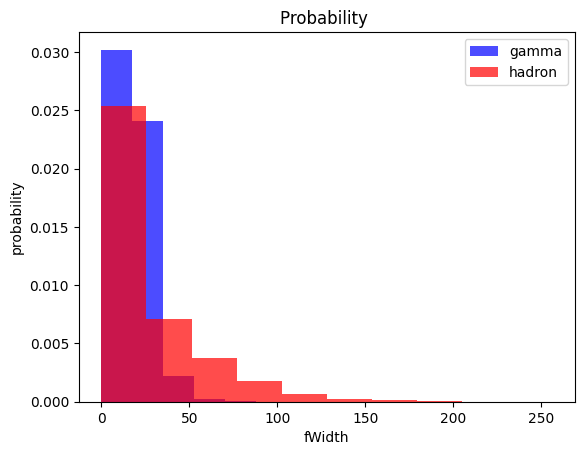

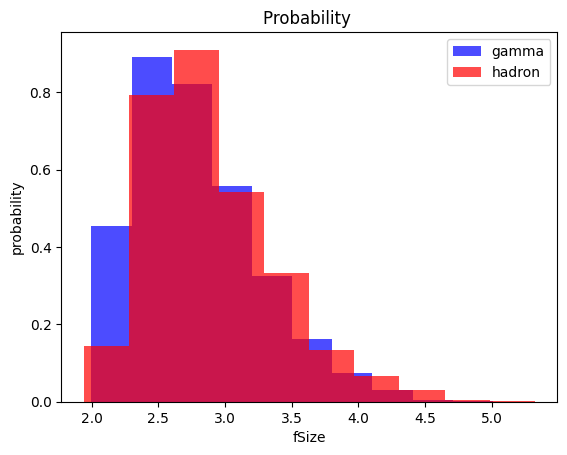

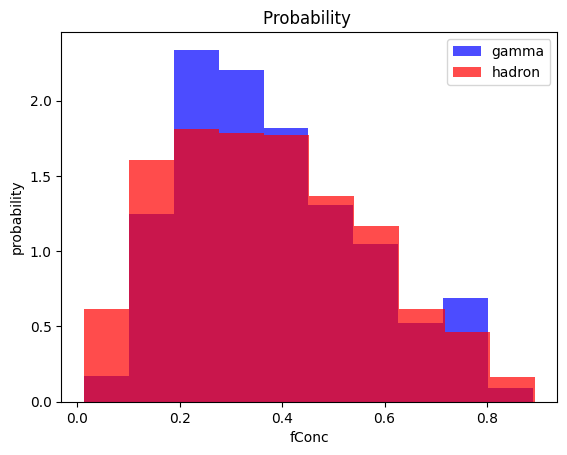

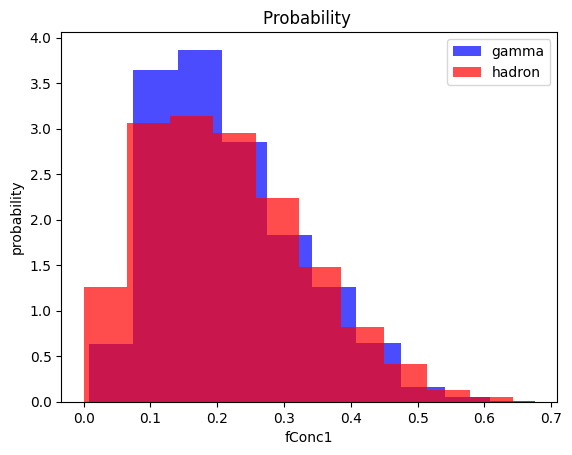

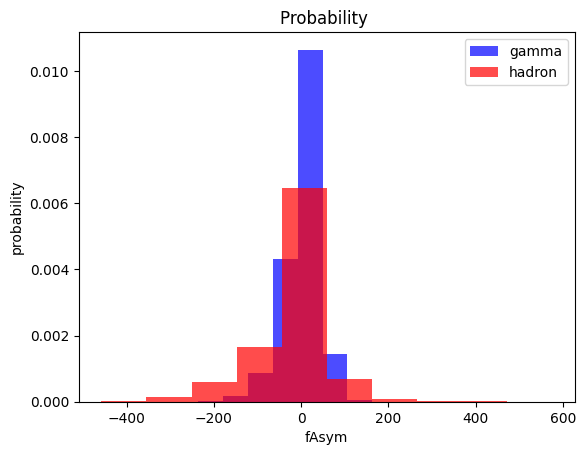

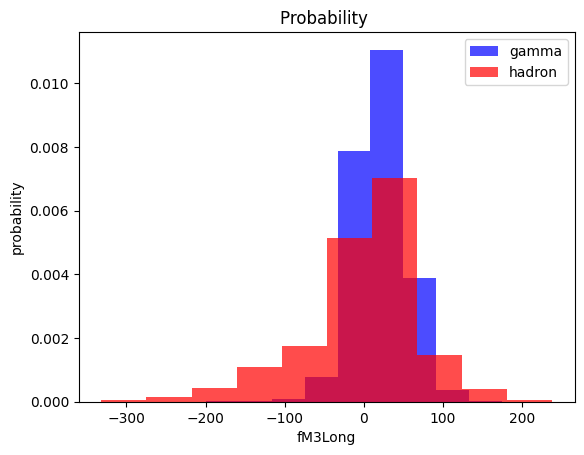

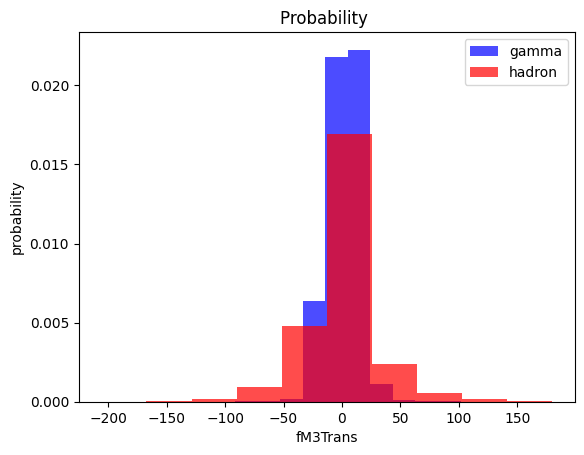

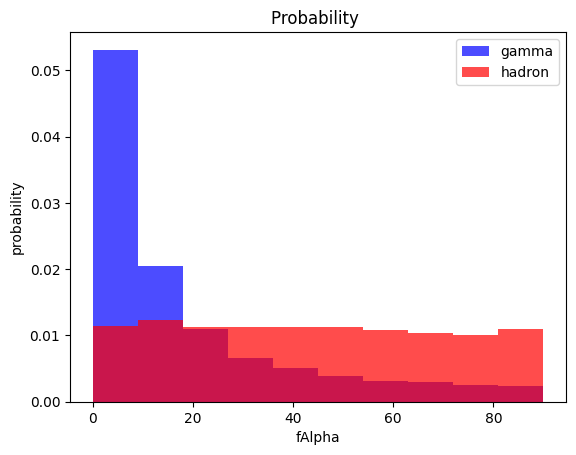

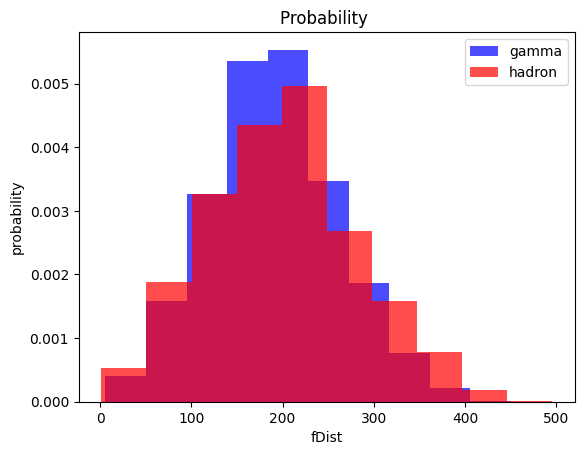

In [15]:
#Let's visualize the correlation
for feature in columns[:-1]:
    plt.hist(df[df['Class']==1][feature],label="gamma",color="blue",alpha=0.7,density=True)
    plt.hist(df[df['Class']==0][feature],label="hadron",color="red",alpha=0.7,density=True)
    #in the above two lines of code we are filtering where class is either 'g=1 or 'h'=0
    #we can either set the colors or not either way we'll get output  
    plt.title("Probability ")
    plt.xlabel(feature)
    plt.ylabel("probability")
    plt.legend()
    plt.show()
    


<b>Train,validation,test datasets

In [16]:
#shuffling the data
 
import numpy as np 
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

#pandas sample() is used to generate a sample random row or column from the function caller data frame.
#parameters of the above:
       # n:int value,number of rows to generate
       #frac:Float value,returns(float value*length of dataframe values) its is a float value rep the fraction of random axis items(rows or columns)to return         
#sample() in python is used to create a random sample without replacement of a specified length meaning that different objects will be selected from a sequence,but once an object has been selected it wont't again
#it is found in the random module
#converts this to a numpy array


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
9009,62.1590,26.5286,3.1909,0.1604,0.0899,37.8441,52.2630,-18.7444,14.3969,276.8980,1
240,56.2479,20.9217,3.1942,0.2168,0.1103,33.8130,36.6852,8.7702,0.5560,220.9710,1
10038,26.6705,14.3241,2.7543,0.4507,0.2298,25.2085,-6.0954,8.1137,14.5024,208.0830,1
681,43.9110,19.6896,3.0465,0.3010,0.1568,10.3476,39.0333,5.8314,14.8740,179.0550,1
17862,29.1942,12.9442,2.5897,0.6610,0.4335,4.1711,-19.5929,12.5269,85.7010,219.2724,0
...,...,...,...,...,...,...,...,...,...,...,...
217,100.7470,16.6321,2.9440,0.3322,0.2110,-110.4110,74.4191,-14.7132,0.3050,230.7130,1
14331,16.0175,11.6210,2.2253,0.6190,0.3780,-0.9426,3.7521,-7.2613,81.0796,150.0790,0
4643,18.4693,15.3164,2.3473,0.5348,0.3258,5.5109,-16.1889,-10.2321,8.1312,185.3330,1
10081,28.6430,18.2119,2.8901,0.3026,0.1578,-1.4694,-6.3293,7.6653,9.4300,181.1710,1


In [18]:
#scaling the colums to ensure relativity
def scale_dataset(df,Oversample=True):
 from sklearn.preprocessing import StandardScaler
 ss=StandardScaler()
 x=df[df.columns[:-1]].values
 y=df[df.columns[-1]].values
 x=ss.fit_transform(x)
 if Oversample:
   from imblearn.over_sampling import RandomOverSampler
   ros=RandomOverSampler()
   x,y=ros.fit_resample(x,y)


 data=np.hstack((x,np.reshape(y,(len(y),1))))
 return data,x,y


In [19]:
#let's understand howoversampling works

In [20]:
#check out for any bias in the train df in the label column
print(len(train[train["Class"]==1]))
print(len(train[train['Class']==0]))

#output shows that there are more gammes than hadronss in the train dataframe therefore there's some bias hence we need some shuffling 
#we can do that through oversampling
print(len(train))

7394
4018
11412


In [21]:
train,x_train,y_train=scale_dataset(train,Oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,Oversample=False)
test,x_test,y_test=scale_dataset(test,Oversample=False)


In [22]:
train=pd.DataFrame(train,columns=columns)
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,0.199762,0.232888,0.775930,-1.204904,-1.130651,0.707495,0.818106,-0.908398,-0.505297,1.101651,1.0
1,0.062250,-0.068221,0.782911,-0.896670,-0.946560,0.640184,0.514852,0.398926,-1.036697,0.350582,1.0
2,-0.625819,-0.422533,-0.147730,0.381625,0.131817,0.496506,-0.317961,0.367733,-0.501247,0.177503,1.0
3,-0.224747,-0.134388,0.470441,-0.436506,-0.526940,0.248360,0.560563,0.259292,-0.486980,-0.212327,1.0
4,-0.567109,-0.496638,-0.495954,1.530944,1.970020,0.145225,-0.580717,0.577421,2.232310,0.327771,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14783,-0.843273,-0.601150,-1.088526,1.106303,1.132586,0.094968,-0.315348,0.291103,0.166015,0.709041,0.0
14784,-0.700352,-0.361902,-0.278684,0.204555,0.266275,-0.070257,-0.373946,-0.539078,1.287924,-1.158150,0.0
14785,-0.744557,-0.669347,-0.377482,0.399114,0.100232,-0.150216,-0.024971,-0.013162,2.340718,-0.883627,0.0
14786,-0.342274,-0.422441,0.144431,-0.223365,0.244618,0.386569,0.195267,0.399819,0.429102,0.149758,0.0


In [23]:
#len(train[train['Class']==1])--wont work coz its just an array

print(len(y_train[y_train==0]))
print(sum(y_train==1))
print(len(train))

7394
7394
14788


## KNN Modellling

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(prediction)

[1 0 1 ... 1 0 1]


In [25]:
accuracy_train=knn.score(x_train,y_train)
print(accuracy_train)
accuracy_test=knn.score(x_test,y_test)
print(accuracy_test)

0.8991073843657019
0.82465825446898


In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1333
           1       0.86      0.87      0.87      2471

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes
 
- To be able to execute the naive bayes model we need to understand conditional probabilty and bayes rule
- It is called naive bayes coz:
     1. It is naive;
          - It assumes the various input features in the feature vector are are independent and for each they      have a personal impact on the target column for classification
     2. It uses bayes rule;
                                     -  n
          - P(Ck|x1,x2,x3,x...xn)=P(Ck)*pi P(Xi|Ck)
                                     - i=1
   - Note:The pi symbol indicates that its a huge multiplication operation                                


In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1333
           1       0.75      0.90      0.81      2471

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.72      3804



In [28]:
# Gaussian Naive Bayes (GaussianNB).

# Can perform online updates to model parameters via partial_fit. For details on algorithm used to update feature means and variance online, see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

#     http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

# Read more in the User Guide <gaussian_naive_bayes>.

# Parameters
# priors : array-like of shape (n_classes,), default=None
#     Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

# var_smoothing : float, default=1e-9
#     Portion of the largest variance of all features that is added to variances for calculation stability.

# Attributes
# class_count_ : ndarray of shape (n_classes,)
#     number of training samples observed in each class.

# class_prior_ : ndarray of shape (n_classes,)
#     probability of each class.

# classes_ : ndarray of shape (n_classes,)
#     class labels known to the classifier.

# epsilon_ : float
#     absolute additive value to variances.

# n_features_in_ : int
#     Number of features seen during fit.

# feature_names_in_ : ndarray of shape (n_features_in_,)
#     Names of features seen during fit. Defined only when X has feature names that are all strings.

# var_ : ndarray of shape (n_classes, n_features)
#     Variance of each feature per class.

# theta_ : ndarray of shape (n_classes, n_features)
#     mean of each feature per class.

# See Also
# BernoulliNB : Naive Bayes classifier for multivariate Bernoulli models.
# CategoricalNB : Naive Bayes classifier for categorical features.
# ComplementNB : Complement Naive Bayes classifier.
# MultinomialNB : Naive Bayes classifier for multinomial models.

# Examples
# >>> import numpy as np
# >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# >>> Y = np.array([1, 1, 1, 2, 2, 2])
# >>> from sklearn.naive_bayes import GaussianNB
# >>> clf = GaussianNB()
# >>> clf.fit(X, Y)
# GaussianNB()
# >>> print(clf.predict([[-0.8, -1]]))
# [1]
# >>> clf_pf = GaussianNB()
# >>> clf_pf.partial_fit(X, Y, np.unique(Y))
# GaussianNB()
# >>> print(clf_pf.predict([[-0.8, -1]]))
# [1]


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)
preds=lg_model.predict(x_test)
print(lg_model.score(x_train,y_train))
print(lg_model.score(x_test,y_test))

0.7738707059778198
0.7839116719242902


In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1333
           1       0.84      0.82      0.83      2471

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



## Support Vector Machine
-it is uses a boundary i.e a line in 2d ,plane in 3d etc with the highest margin(the margins are provided by the closest point on bothnclaases near the boundary and are refered to as _support vectors_ hence the name support vector machines).
- It is also good to note that Support Vector Machine model is not roust to outliers therefore in a case where there are outliers it is not the best model to be used

- In a case we apply some transformations where y or x1 is x**2 that is called the **kernel trick**

In [31]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
preds=svm_model.predict(x_test)
print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test,y_test))

0.8548147146334866
0.8577812828601472


In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1333
           1       0.89      0.89      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Networks

In [33]:
import tensorflow as tf

In [37]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])  

#compiling
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy",metrics=['accuracy'])

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
